LUNG CANCER DATA

In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

LOAD THE DATASET 

In [6]:
data=pd.read_csv('Lung Cancer Dataset.csv')
data

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,YES
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,YES
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,NO
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,NO


DATA PREPROCESSING

In [8]:
data.shape

(5000, 18)

In [9]:
data.isnull().sum()

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

In [10]:
data.columns

Index(['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS',
       'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL',
       'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION',
       'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE',
       'PULMONARY_DISEASE'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [12]:
data.dtypes

AGE                         int64
GENDER                      int64
SMOKING                     int64
FINGER_DISCOLORATION        int64
MENTAL_STRESS               int64
EXPOSURE_TO_POLLUTION       int64
LONG_TERM_ILLNESS           int64
ENERGY_LEVEL              float64
IMMUNE_WEAKNESS             int64
BREATHING_ISSUE             int64
ALCOHOL_CONSUMPTION         int64
THROAT_DISCOMFORT           int64
OXYGEN_SATURATION         float64
CHEST_TIGHTNESS             int64
FAMILY_HISTORY              int64
SMOKING_FAMILY_HISTORY      int64
STRESS_IMMUNE               int64
PULMONARY_DISEASE          object
dtype: object

In [13]:
data['PULMONARY_DISEASE']=data['PULMONARY_DISEASE'].map({'YES':1,'NO':0})

In [14]:
data.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1


EXPLORATORY DATA ANALYSIS (EDA)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

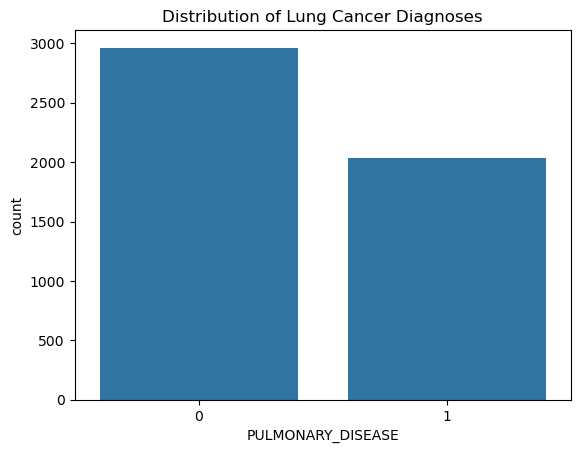

In [17]:
# Visualize the distribution of the target variable
sns.countplot(x='PULMONARY_DISEASE', data=data)
plt.title('Distribution of Lung Cancer Diagnoses')
plt.show()

In [18]:
data.corr()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
AGE,1.000000,-0.004262,-0.030163,-0.012559,-0.027137,-0.004834,0.020401,-0.006921,-0.023072,0.000708,-0.001551,0.032412,-0.001354,-0.005792,0.024816,0.009668,-0.027076,-0.006489
GENDER,-0.004262,1.000000,0.010182,-0.020919,-0.014236,-0.024890,0.017220,-0.006845,0.020156,0.006202,-0.015577,-0.031971,-0.006655,0.027683,0.037199,0.037498,-0.000253,-0.004025
SMOKING,-0.030163,0.010182,1.000000,0.005892,0.008839,-0.008753,0.009048,0.018924,0.007399,0.007500,0.013131,-0.002220,0.014124,0.010220,0.013309,0.358182,-0.001446,0.461467
FINGER_DISCOLORATION,-0.012559,-0.020919,0.005892,1.000000,0.001116,0.009729,-0.021592,-0.003429,0.000193,0.010217,-0.015992,0.017094,0.011930,0.000497,-0.012645,-0.012390,0.005963,0.026066
MENTAL_STRESS,-0.027137,-0.014236,0.008839,0.001116,1.000000,0.003466,0.027975,0.002126,-0.014420,0.008755,-0.005022,0.003985,0.014609,0.005719,0.012624,0.006377,0.475476,0.089367
EXPOSURE_TO_POLLUTION,-0.004834,-0.024890,-0.008753,0.009729,0.003466,1.000000,-0.016238,-0.011571,0.003616,0.006977,0.005995,0.012767,-0.000082,0.004455,0.003798,-0.005284,-0.006655,0.095222
LONG_TERM_ILLNESS,0.020401,0.017220,0.009048,-0.021592,0.027975,-0.016238,1.000000,0.020933,0.000840,0.019481,0.000149,-0.015141,0.015301,0.003359,0.007240,0.004016,0.012592,0.012589
ENERGY_LEVEL,-0.006921,-0.006845,0.018924,-0.003429,0.002126,-0.011571,0.020933,1.000000,-0.006170,-0.000905,0.003187,0.002492,0.008761,-0.005799,0.004743,0.011229,-0.012590,0.171479
IMMUNE_WEAKNESS,-0.023072,0.020156,0.007399,0.000193,-0.014420,0.003616,0.000840,-0.006170,1.000000,0.019460,0.004970,-0.026960,0.005463,0.000347,0.008242,0.012493,0.637578,0.124736
BREATHING_ISSUE,0.000708,0.006202,0.007500,0.010217,0.008755,0.006977,0.019481,-0.000905,0.019460,1.000000,0.012023,-0.012205,0.004543,0.010624,-0.004146,0.003219,0.010057,0.270464


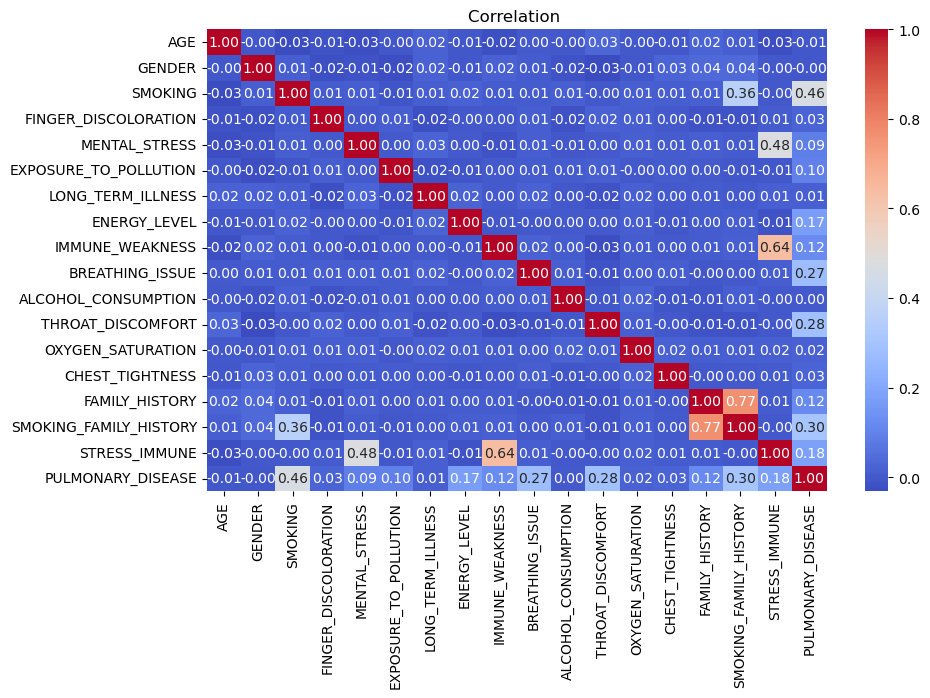

In [19]:

# Visualize the correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation ')
plt.show()

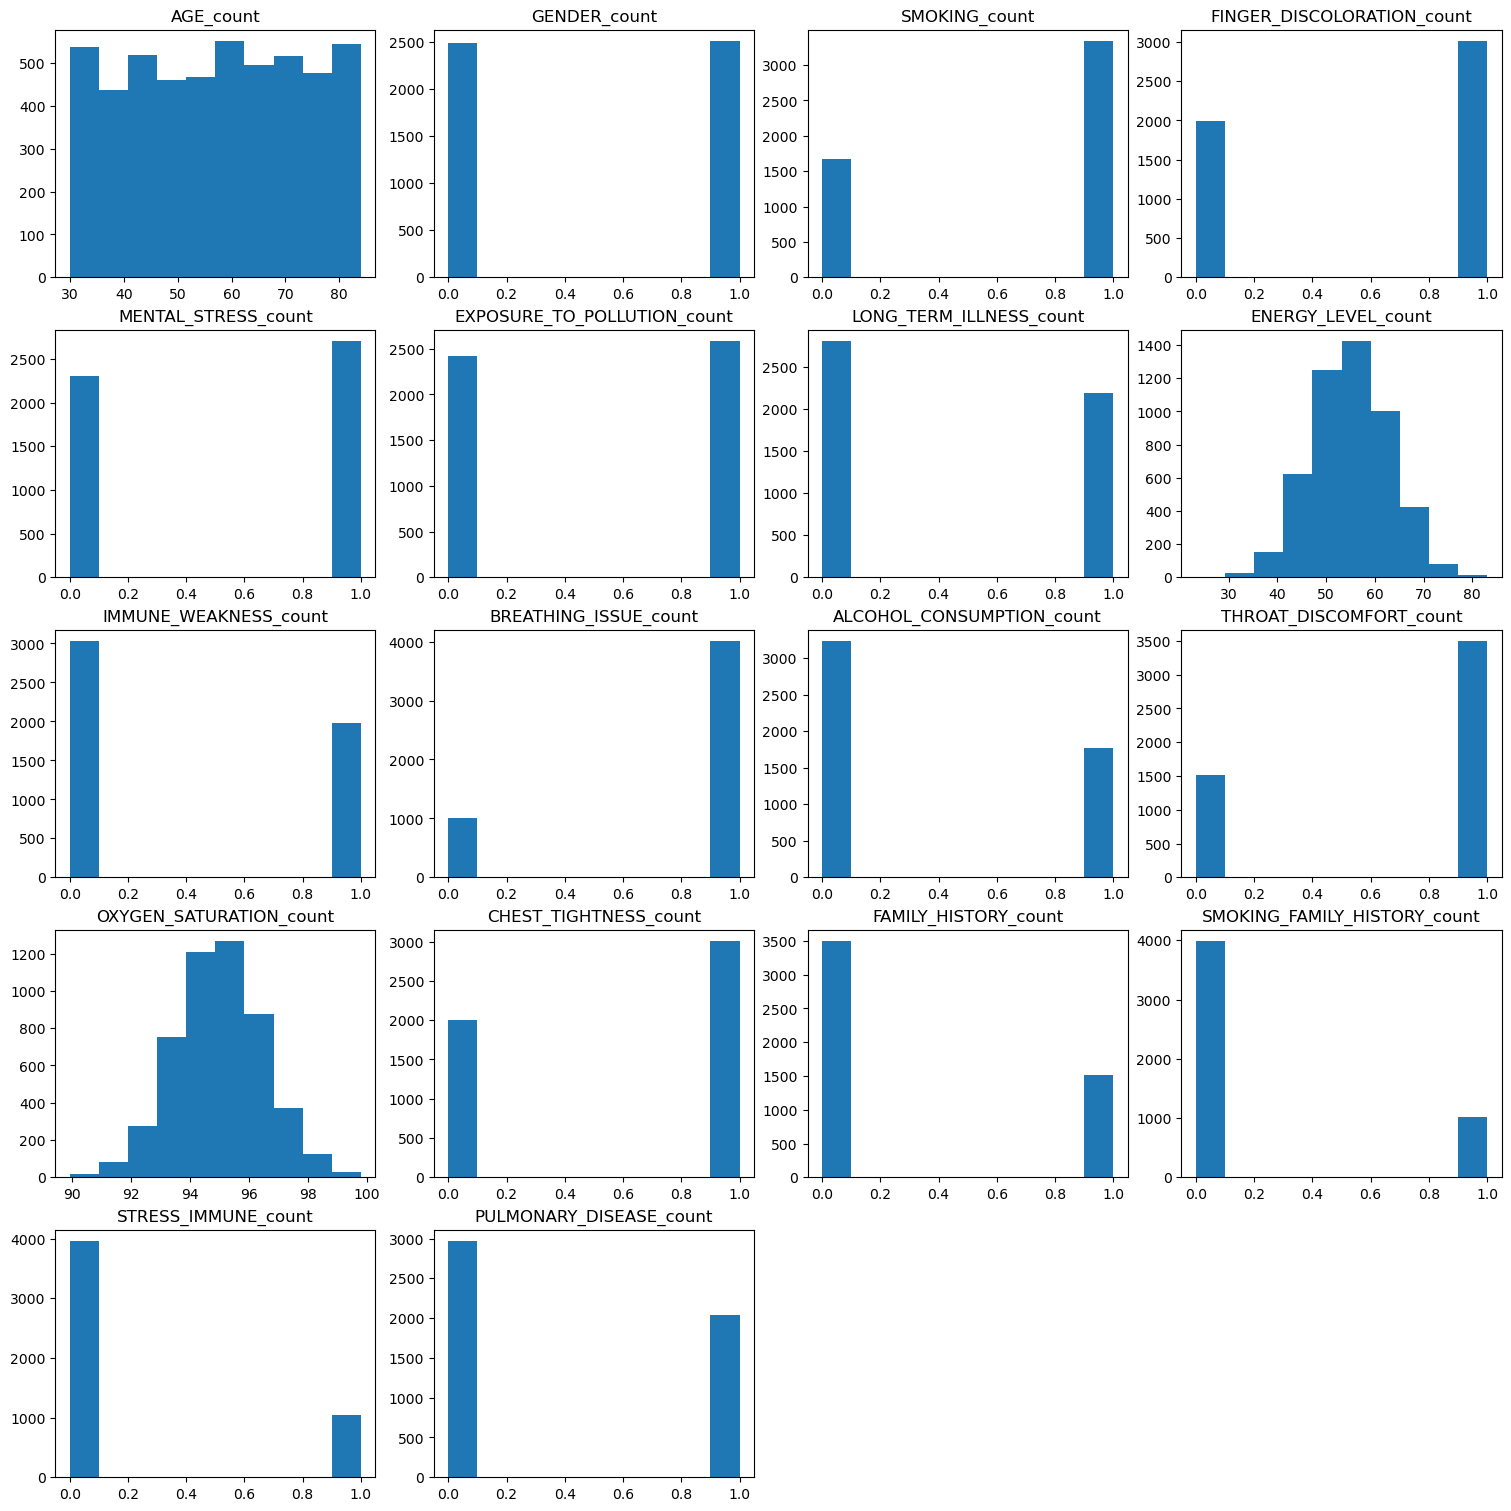

In [20]:
col_count=['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS','EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL','IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION','THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS','FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE','PULMONARY_DISEASE']
plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(col_count)):
    plt.subplot(5,4,i+1)
    plt.hist(data=data,x=col_count[i])
    plt.title(col_count[i]+'_count')
plt.show()

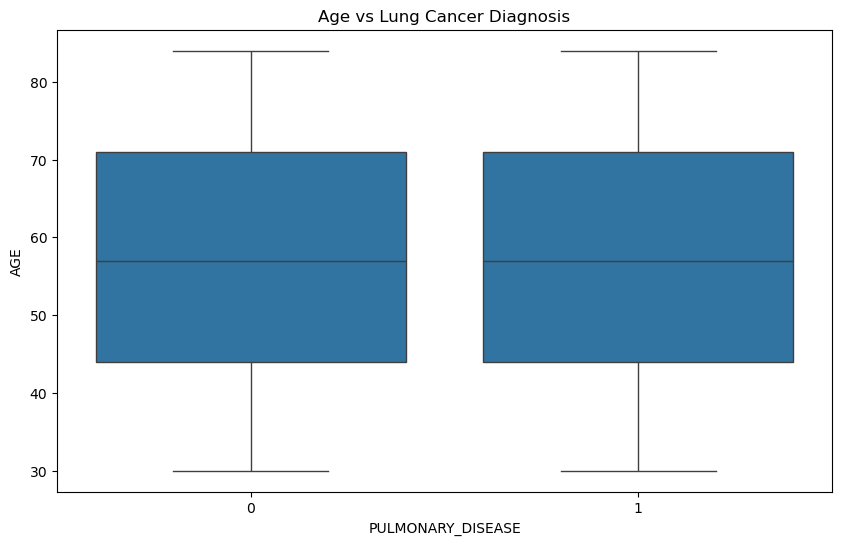

In [21]:
# Visualizing the relationship between age and lung cancer
plt.figure(figsize=(10, 6))
sns.boxplot(x='PULMONARY_DISEASE', y='AGE', data=data)
plt.title('Age vs Lung Cancer Diagnosis')
plt.show()

<Axes: >

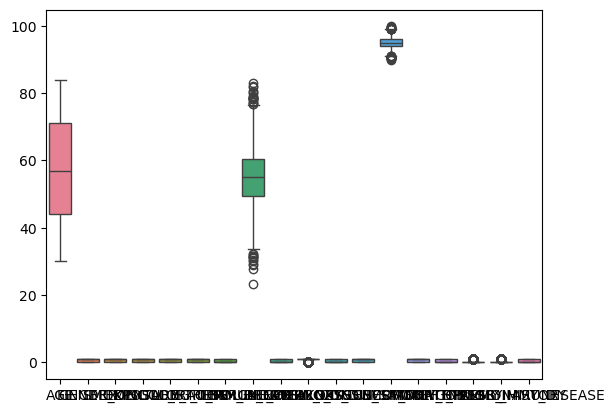

In [22]:
sns.boxplot(data)

Text(0.5, 1.0, 'PULMONARY_DISEASE')

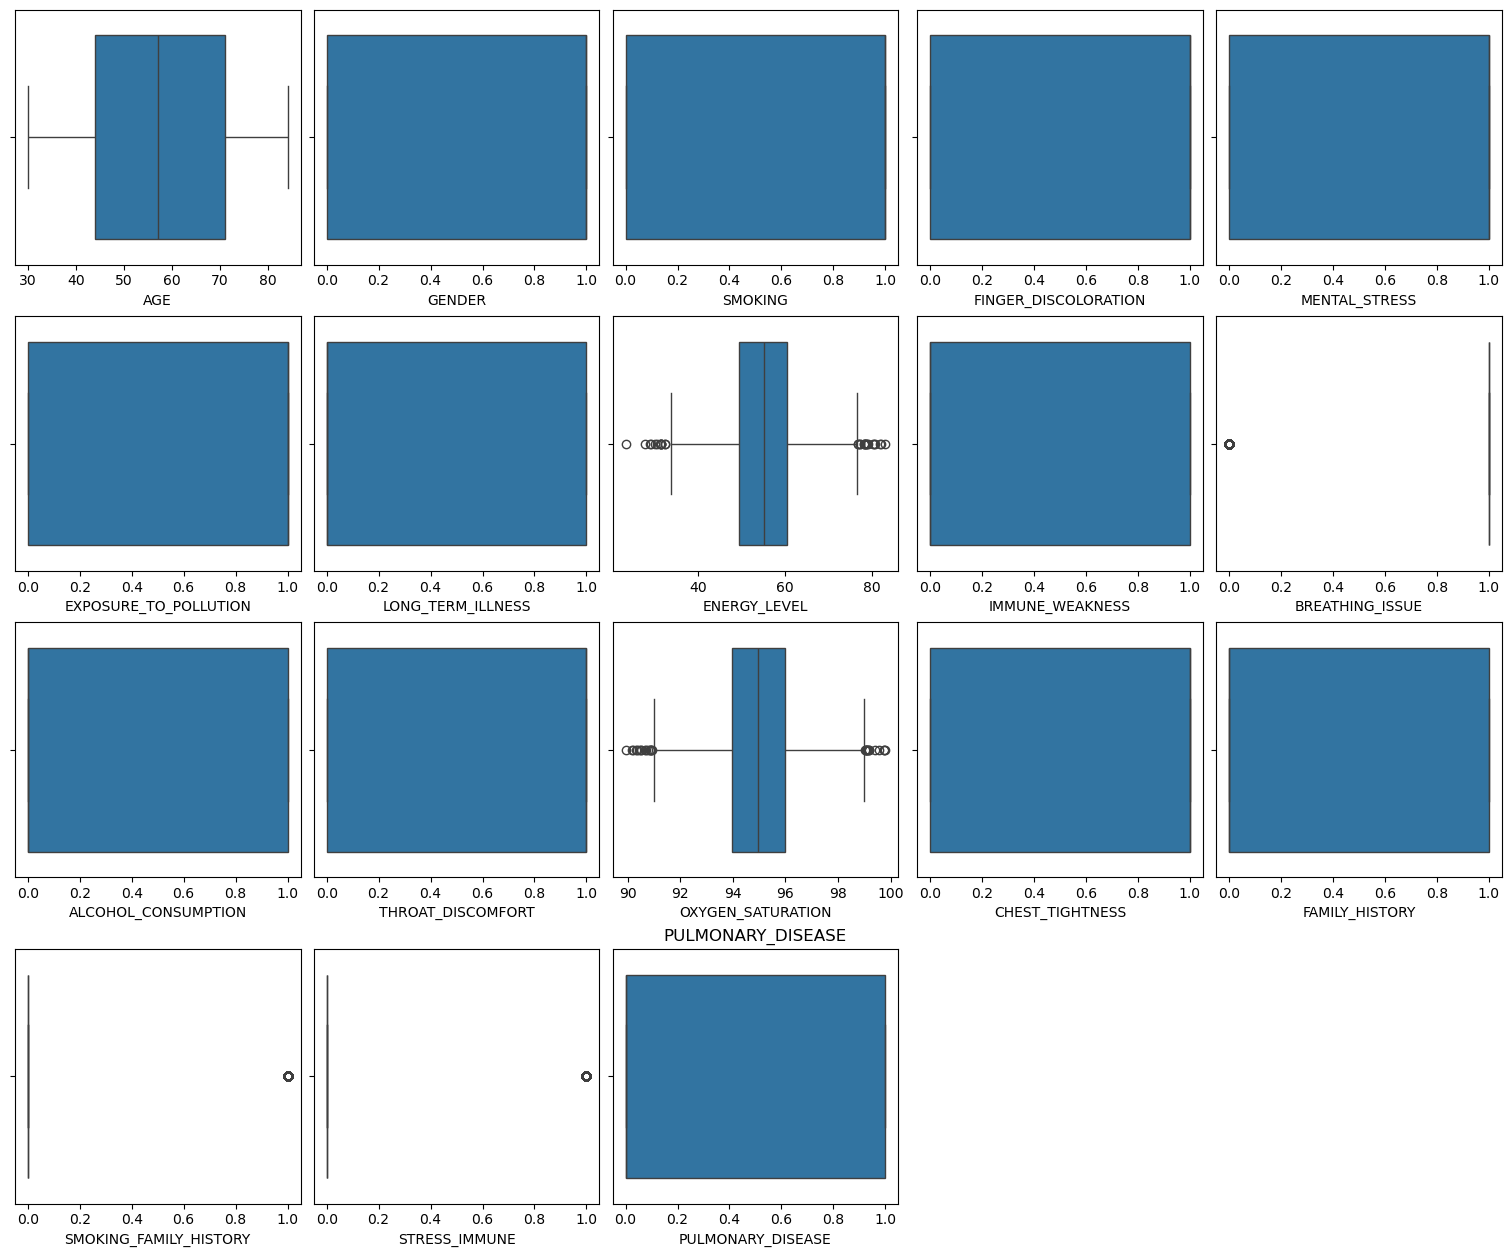

In [23]:
 col=['AGE','GENDER','SMOKING','FINGER_DISCOLORATION','MENTAL_STRESS','EXPOSURE_TO_POLLUTION','LONG_TERM_ILLNESS','ENERGY_LEVEL','IMMUNE_WEAKNESS',
      'BREATHING_ISSUE','ALCOHOL_CONSUMPTION','THROAT_DISCOMFORT','OXYGEN_SATURATION','CHEST_TIGHTNESS','FAMILY_HISTORY','SMOKING_FAMILY_HISTORY',
      'STRESS_IMMUNE','PULMONARY_DISEASE']

plt.figure(figsize=(15,15),layout='constrained')
 for i in range(len(col)):
       plt.subplot(5,5,i+1)
       sns.boxplot(data=data,x=col[i])
     
plt.title(col[i])

OUTLIER HANDLING

<Axes: >

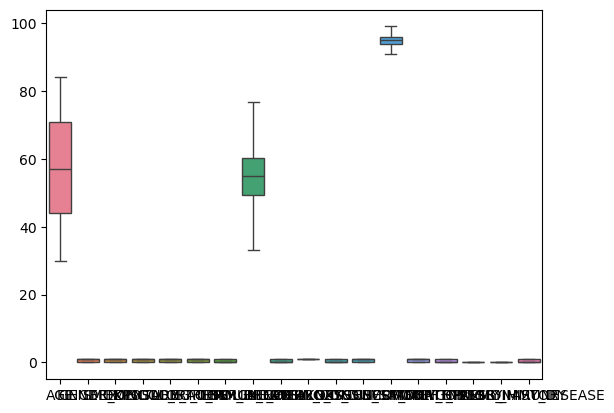

In [25]:
lst=['ENERGY_LEVEL','BREATHING_ISSUE','OXYGEN_SATURATION','SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE']
for i in lst:
  Q1=data[i].quantile(0.25)
  Q3=data[i].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  data.loc[(data[i]>=upper_limit),i]=upper_limit
  data.loc[(data[i]<=lower_limit),i]=lower_limit
sns.boxplot(data)

MODEL SPLITTING

In [27]:
x=data.drop('PULMONARY_DISEASE',axis=1)
y=data['PULMONARY_DISEASE']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [29]:
# Scale features (Standardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

MODEL BUILDING

LOGISTIC REGRESSION

In [32]:
from sklearn.linear_model import LogisticRegression

Test accuracy: 0.8173333333333334
train accuracy: 0.8114285714285714
Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       902
           1       0.76      0.80      0.78       598

    accuracy                           0.82      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.82      0.82      0.82      1500



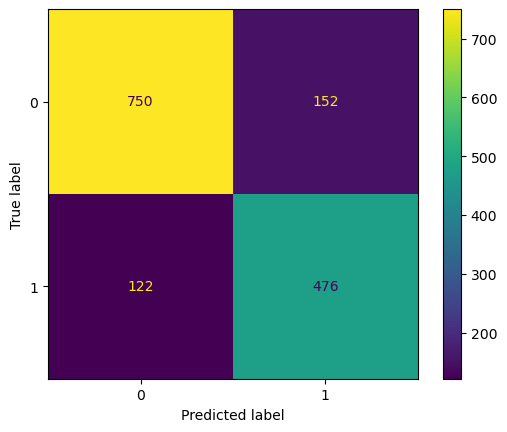

In [33]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print('Test accuracy:',log_reg.score(X_test,y_test))
print('train accuracy:',log_reg.score(X_train,y_train))
print("Logistic Regression Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
log_sc=accuracy_score(y_test,y_pred)

DECISION TREE CLASSIFIER

In [35]:
from sklearn.tree import DecisionTreeClassifier

Test accuracy: 0.744
train accuracy: 1.0
Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       902
           1       0.67      0.69      0.68       598

    accuracy                           0.74      1500
   macro avg       0.73      0.74      0.73      1500
weighted avg       0.75      0.74      0.74      1500



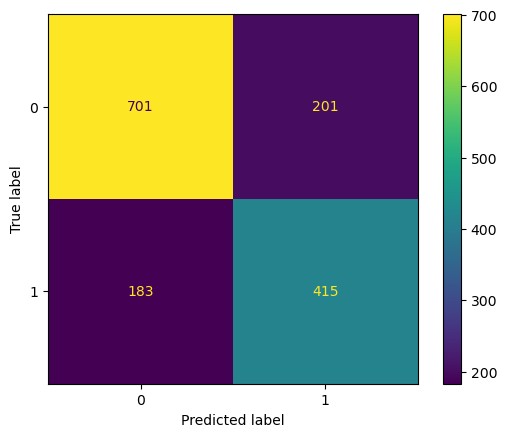

In [36]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
print('Test accuracy:',dt_clf.score(X_test,y_test))
print('train accuracy:',dt_clf.score(X_train,y_train))
print("Decision Tree Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
dt_sc=accuracy_score(y_test,y_pred)

RANDOM FOREST CLASSIFIER

In [38]:
from sklearn.ensemble import RandomForestClassifier

Test accuracy: 0.8253333333333334
train accuracy: 1.0
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       902
           1       0.76      0.83      0.79       598

    accuracy                           0.83      1500
   macro avg       0.82      0.83      0.82      1500
weighted avg       0.83      0.83      0.83      1500



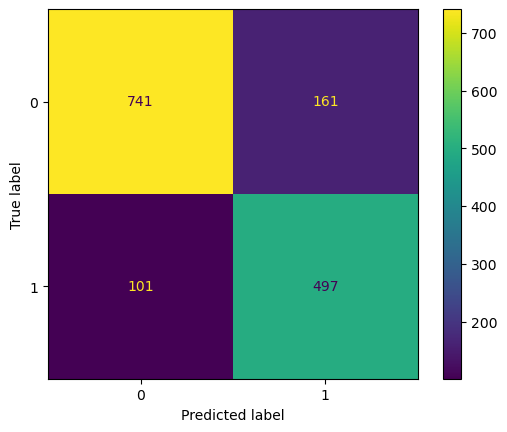

In [39]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('Test accuracy:',rf_clf.score(X_test,y_test))
print('train accuracy:',rf_clf.score(X_train,y_train))
print("Random Forest Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
rf_sc=accuracy_score(y_test,y_pred)

K NEIGHBORS CLASSIFIER (KNN)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

Test accuracy: 0.7766666666666666
train accuracy: 0.8594285714285714
KNN Performance:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       902
           1       0.70      0.77      0.73       598

    accuracy                           0.78      1500
   macro avg       0.77      0.77      0.77      1500
weighted avg       0.78      0.78      0.78      1500



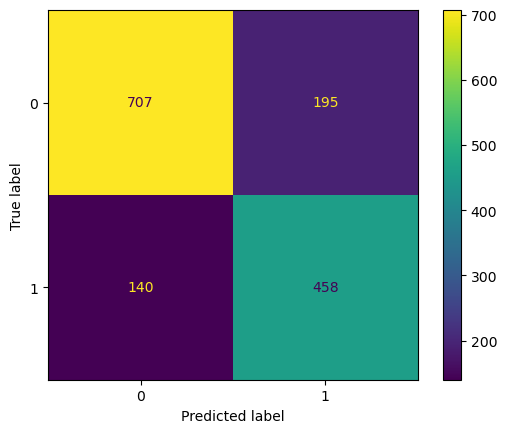

In [42]:
knn_clf= KNeighborsClassifier()
knn_clf.fit(X_train,y_train) 
y_pred = knn_clf.predict(X_test)
print('Test accuracy:',knn_clf.score(X_test,y_test))
print('train accuracy:',knn_clf.score(X_train,y_train))
print("KNN Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
knn_sc=accuracy_score(y_test,y_pred)

SUPPORT VECTOR MECHANISM (SVM)

In [44]:
from sklearn.svm import SVC

Test accuracy: 0.7786666666666666
train accuracy: 0.7768571428571428
SVM Linear Performance:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       902
           1       0.69      0.80      0.74       598

    accuracy                           0.78      1500
   macro avg       0.77      0.78      0.77      1500
weighted avg       0.79      0.78      0.78      1500



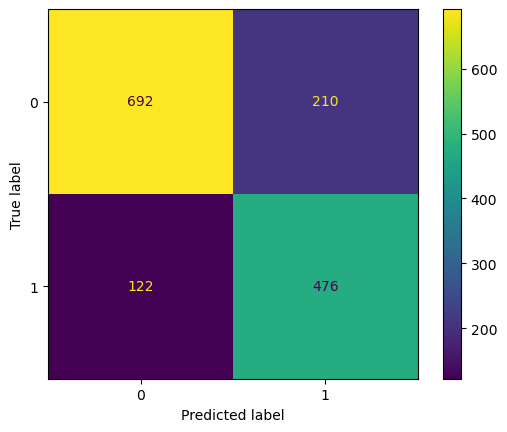

In [45]:
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print('Test accuracy:',svm.score(X_test,y_test))
print('train accuracy:',svm.score(X_train,y_train))
print("SVM Linear Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
svm_sc=accuracy_score(y_test,y_pred)

Test accuracy: 0.826
train accuracy: 0.8457142857142858
SVM Poly Performance:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       902
           1       0.74      0.86      0.80       598

    accuracy                           0.83      1500
   macro avg       0.82      0.83      0.82      1500
weighted avg       0.84      0.83      0.83      1500



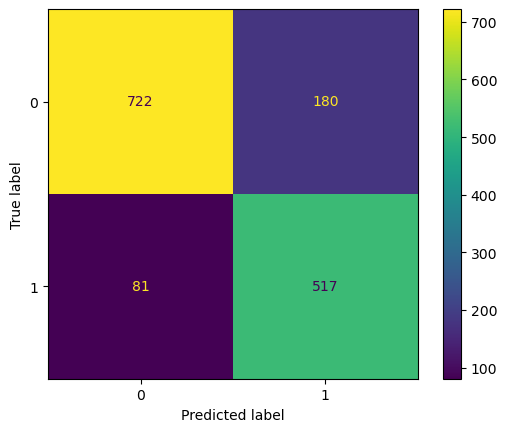

In [46]:
svm1 = SVC(kernel='poly', degree=3 )
svm1.fit(X_train,y_train)
y_pred = svm1.predict(X_test)
print('Test accuracy:',svm1.score(X_test,y_test))
print('train accuracy:',svm1.score(X_train,y_train))
print("SVM Poly Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
svm1_sc=accuracy_score(y_test,y_pred)

Test accuracy: 0.7573333333333333
train accuracy: 0.6948571428571428
SVM Sigmoid Performance:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       902
           1       0.68      0.73      0.71       598

    accuracy                           0.76      1500
   macro avg       0.75      0.75      0.75      1500
weighted avg       0.76      0.76      0.76      1500



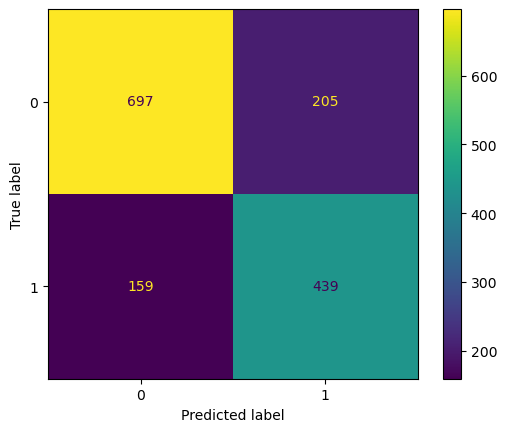

In [47]:
svm2 = SVC(kernel='sigmoid')
svm2.fit(X_train,y_train)
y_pred = svm2.predict(X_test)
print('Test accuracy:',svm2.score(X_test,y_test))
print('train accuracy:',svm2.score(X_train,y_train))
print("SVM Sigmoid Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
svm2_sc=accuracy_score(y_test,y_pred)

Test accuracy: 0.8246666666666667
train accuracy: 0.8545714285714285
SVM Rbf Performance:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       902
           1       0.75      0.84      0.79       598

    accuracy                           0.82      1500
   macro avg       0.82      0.83      0.82      1500
weighted avg       0.83      0.82      0.83      1500



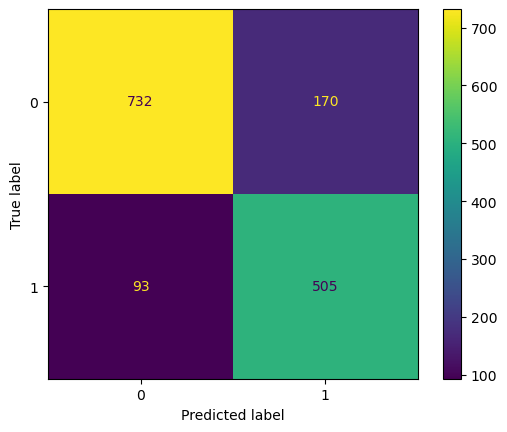

In [48]:
svm3 = SVC(kernel='rbf')
svm3.fit(X_train,y_train)
y_pred = svm3.predict(X_test)
print('Test accuracy:',svm3.score(X_test,y_test))
print('train accuracy:',svm3.score(X_train,y_train))
print("SVM Rbf Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
svm3_sc=accuracy_score(y_test,y_pred)

Test accuracy: 0.8246666666666667
train accuracy: 0.8545714285714285
SVC Performance:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       902
           1       0.75      0.84      0.79       598

    accuracy                           0.82      1500
   macro avg       0.82      0.83      0.82      1500
weighted avg       0.83      0.82      0.83      1500



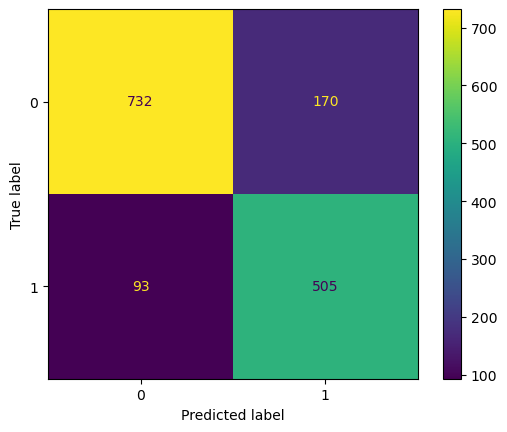

In [49]:
svm4 = SVC()
svm4.fit(X_train,y_train)
y_pred = svm4.predict(X_test)
print('Test accuracy:',svm4.score(X_test,y_test))
print('train accuracy:',svm4.score(X_train,y_train))
print("SVC Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
svm4_sc=accuracy_score(y_test,y_pred)

NAIVE BAYES (Gaussian NB)

In [51]:
from sklearn.naive_bayes import GaussianNB

Test accuracy: 0.7953333333333333
train accuracy: 0.7874285714285715
 GaussianNb Performance:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       902
           1       0.71      0.82      0.76       598

    accuracy                           0.80      1500
   macro avg       0.79      0.80      0.79      1500
weighted avg       0.81      0.80      0.80      1500



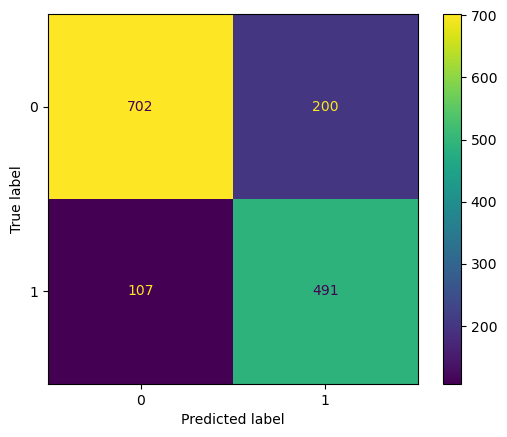

In [52]:
gaus = GaussianNB()
gaus.fit(X_train,y_train)
y_pred = gaus.predict(X_test)
print('Test accuracy:',gaus.score(X_test,y_test))
print('train accuracy:',gaus.score(X_train,y_train))
print(" GaussianNb Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
gaus_sc=accuracy_score(y_test,y_pred)

ENSEMBLE MODEL

Adaboost Classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier

Test accuracy: 0.812
train accuracy: 0.82
AdaBoost Performance:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       902
           1       0.74      0.81      0.77       598

    accuracy                           0.81      1500
   macro avg       0.80      0.81      0.81      1500
weighted avg       0.82      0.81      0.81      1500



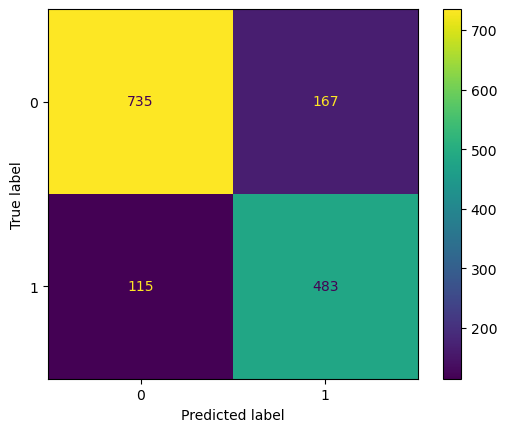

In [56]:
ab_clf = AdaBoostClassifier(n_estimators=100, learning_rate= 0.3 ,random_state=20)
ab_clf.fit(X_train,y_train)
y_pred = ab_clf.predict(X_test)
print('Test accuracy:',ab_clf.score(X_test,y_test))
print('train accuracy:',ab_clf.score(X_train,y_train))
print("AdaBoost Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
ab_sc=accuracy_score(y_test,y_pred)

Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

Test accuracy: 0.816
train accuracy: 0.896
XGBoost Performance:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       902
           1       0.74      0.82      0.78       598

    accuracy                           0.82      1500
   macro avg       0.81      0.82      0.81      1500
weighted avg       0.82      0.82      0.82      1500



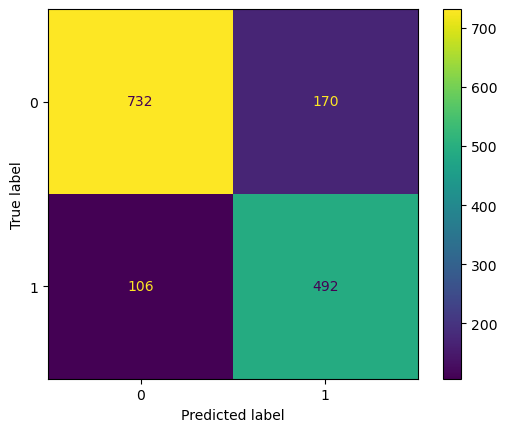

In [59]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, random_state=20)
gb_clf.fit(X_train,y_train)
y_pred = gb_clf.predict(X_test)
print('Test accuracy:',gb_clf.score(X_test,y_test))
print('train accuracy:',gb_clf.score(X_train,y_train))
print("XGBoost Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
gb_sc=accuracy_score(y_test,y_pred)

XG boost Classifier

In [61]:
from xgboost import XGBClassifier

Test accuracy: 0.8133333333333334
train accuracy: 0.9917142857142857
XGBoost Performance:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       902
           1       0.75      0.80      0.77       598

    accuracy                           0.81      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.82      0.81      0.81      1500



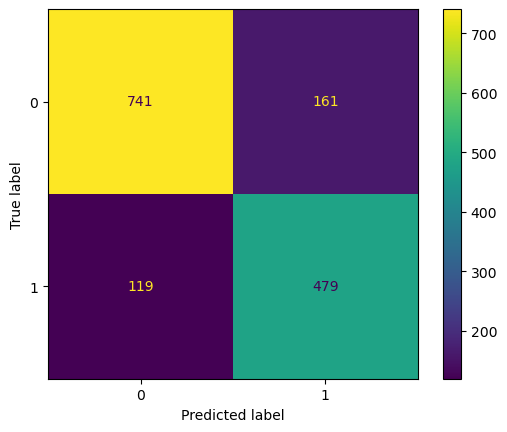

In [62]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)
print('Test accuracy:',xgb_clf.score(X_test,y_test))
print('train accuracy:',xgb_clf.score(X_train,y_train))
print("XGBoost Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
xgb_sc=accuracy_score(y_test,y_pred)*100

INITIAL PERFORMANCE

In [64]:
tb=pd.DataFrame()
tb['model']=pd.Series(['log_reg','dt_clf','rf_clf','knn_clf','svm','svm1','svm2','svm3','svm4','gaus','ab_clf','gb_clf','xgb_clf'])
tb['accuracy']=pd.Series([log_sc,dt_sc,rf_sc,knn_sc,svm_sc,svm1_sc,svm2_sc,svm3_sc,svm4_sc,gaus_sc,ab_sc,gb_sc,xgb_sc])
tb

,model,accuracy
0,log_reg,0.817333
1,dt_clf,0.744000
2,rf_clf,0.825333
3,knn_clf,0.776667
4,svm,0.778667
5,svm1,0.826000
6,svm2,0.757333
7,svm3,0.824667
8,svm4,0.824667
9,gaus,0.795333


In [65]:
data.value_counts('PULMONARY_DISEASE')

PULMONARY_DISEASE
0    2963
1    2037
Name: count, dtype: int64

OVER SAMPLING

In [67]:
from imblearn.over_sampling import SMOTE  
smote=SMOTE(random_state=5)                
x_re,y_re=smote.fit_resample(X_train,y_train)
y_re.value_counts()

PULMONARY_DISEASE
1    2061
0    2061
Name: count, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.3,random_state=2)

Test accuracy: 0.8270008084074374
train accuracy: 0.8253032928942807
Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       600
           1       0.81      0.87      0.84       637

    accuracy                           0.83      1237
   macro avg       0.83      0.83      0.83      1237
weighted avg       0.83      0.83      0.83      1237



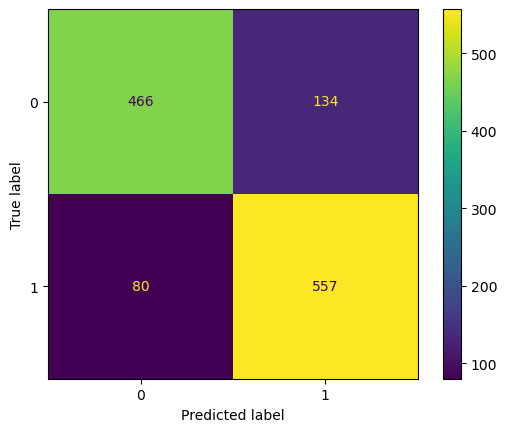

In [69]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
print('Test accuracy:',log_reg.score(x_test,y_test))
print('train accuracy:',log_reg.score(x_train,y_train))
print("Logistic Regression Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
log_osc=accuracy_score(y_test,y_pred)

Test accuracy: 0.7582861762328214
train accuracy: 1.0
Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       600
           1       0.76      0.78      0.77       637

    accuracy                           0.76      1237
   macro avg       0.76      0.76      0.76      1237
weighted avg       0.76      0.76      0.76      1237



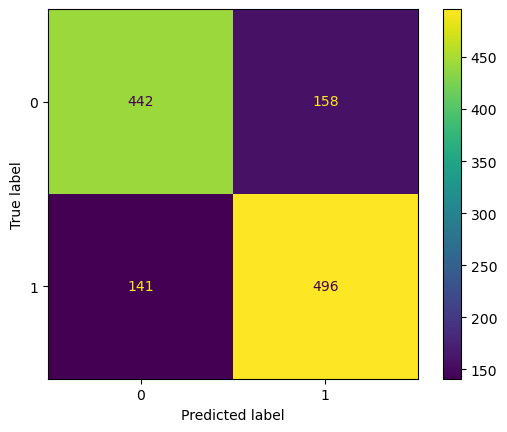

In [70]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)
print('Test accuracy:',dt_clf.score(x_test,y_test))
print('train accuracy:',dt_clf.score(x_train,y_train))
print("Decision Tree Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
dt_osc=accuracy_score(y_test,y_pred)

Test accuracy: 0.8577202910266775
train accuracy: 1.0
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       600
           1       0.84      0.89      0.87       637

    accuracy                           0.86      1237
   macro avg       0.86      0.86      0.86      1237
weighted avg       0.86      0.86      0.86      1237



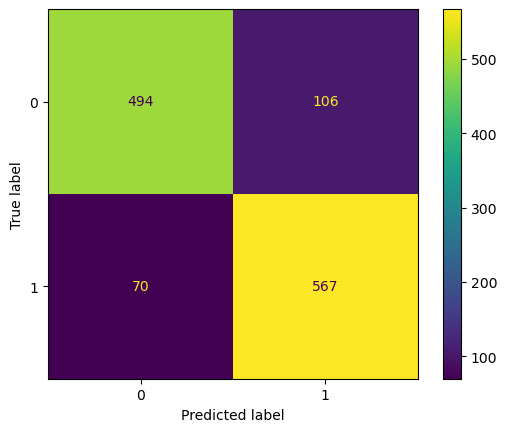

In [71]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
print('Test accuracy:',rf_clf.score(x_test,y_test))
print('train accuracy:',rf_clf.score(x_train,y_train))
print("Random Forest Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
rf_osc=accuracy_score(y_test,y_pred)

Test accuracy: 0.7954729183508489
train accuracy: 0.8759098786828423
KNN Performance:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       600
           1       0.76      0.87      0.81       637

    accuracy                           0.80      1237
   macro avg       0.80      0.79      0.79      1237
weighted avg       0.80      0.80      0.79      1237



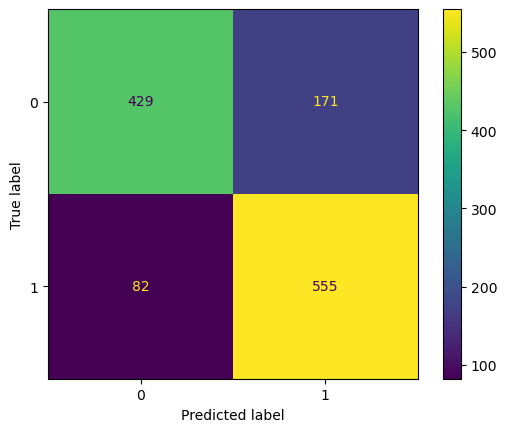

In [72]:
knn_clf= KNeighborsClassifier()
knn_clf.fit(x_train,y_train) 
y_pred = knn_clf.predict(x_test)
print('Test accuracy:',knn_clf.score(x_test,y_test))
print('train accuracy:',knn_clf.score(x_train,y_train))
print("KNN Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
knn_osc=accuracy_score(y_test,y_pred)

Test accuracy: 0.7930476960388035
train accuracy: 0.7788561525129982
SVM Linear Performance:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       600
           1       0.79      0.81      0.80       637

    accuracy                           0.79      1237
   macro avg       0.79      0.79      0.79      1237
weighted avg       0.79      0.79      0.79      1237



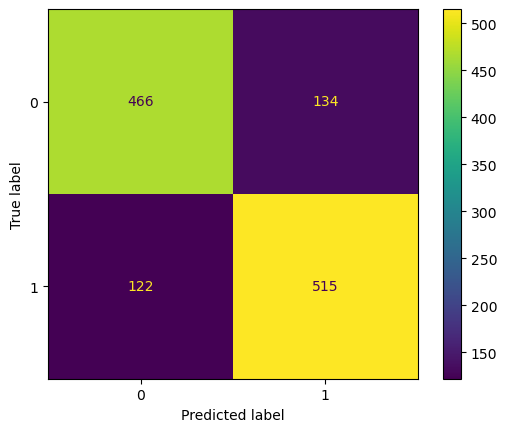

In [73]:
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print('Test accuracy:',svm.score(x_test,y_test))
print('train accuracy:',svm.score(x_train,y_train))
print("SVM Linear Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
svm_osc=accuracy_score(y_test,y_pred)

Test accuracy: 0.8310428455941795
train accuracy: 0.866897746967071
SVM Poly Performance:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       600
           1       0.79      0.91      0.85       637

    accuracy                           0.83      1237
   macro avg       0.84      0.83      0.83      1237
weighted avg       0.84      0.83      0.83      1237



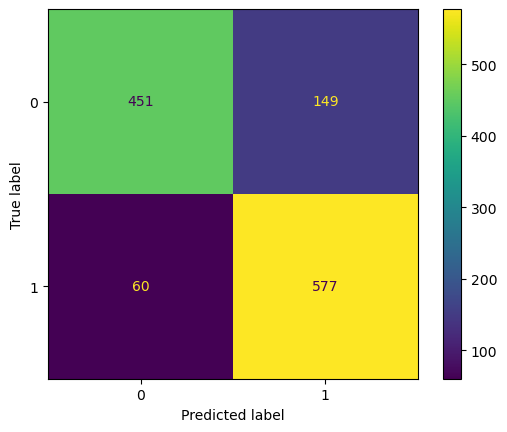

In [74]:
svm1 = SVC(kernel='poly', degree=3 )
svm1.fit(x_train,y_train)
y_pred = svm1.predict(x_test)
print('Test accuracy:',svm1.score(x_test,y_test))
print('train accuracy:',svm1.score(x_train,y_train))
print("SVM Poly Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
svm1_osc=accuracy_score(y_test,y_pred)

Test accuracy: 0.7396928051738076
train accuracy: 0.701213171577123
SVM Sigmoid Performance:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       600
           1       0.74      0.76      0.75       637

    accuracy                           0.74      1237
   macro avg       0.74      0.74      0.74      1237
weighted avg       0.74      0.74      0.74      1237



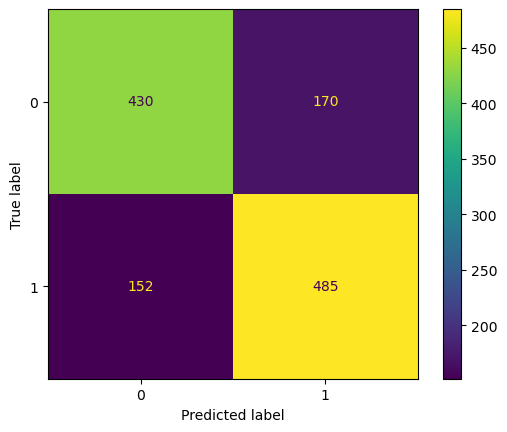

In [75]:
svm2 = SVC(kernel='sigmoid')
svm2.fit(x_train,y_train)
y_pred = svm2.predict(x_test)
print('Test accuracy:',svm2.score(x_test,y_test))
print('train accuracy:',svm2.score(x_train,y_train))
print("SVM Sigmoid Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
svm2_osc=accuracy_score(y_test,y_pred)

Test accuracy: 0.8536782538399353
train accuracy: 0.8759098786828423
SVM Rbf Performance:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       600
           1       0.83      0.91      0.86       637

    accuracy                           0.85      1237
   macro avg       0.86      0.85      0.85      1237
weighted avg       0.86      0.85      0.85      1237



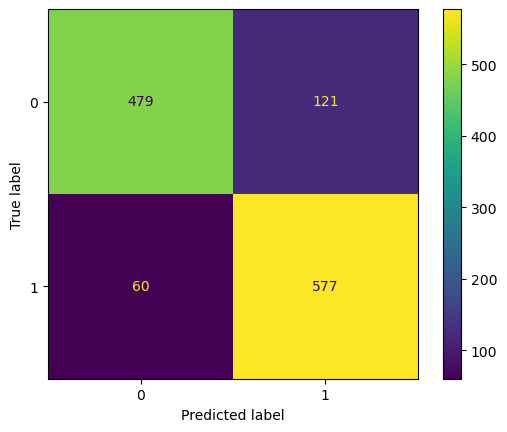

In [76]:
svm3 = SVC(kernel='rbf')
svm3.fit(x_train,y_train)
y_pred = svm3.predict(x_test)
print('Test accuracy:',svm3.score(x_test,y_test))
print('train accuracy:',svm3.score(x_train,y_train))
print("SVM Rbf Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
svm3_osc=accuracy_score(y_test,y_pred)

Test accuracy: 0.8536782538399353
train accuracy: 0.8759098786828423
SVC Performance:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       600
           1       0.83      0.91      0.86       637

    accuracy                           0.85      1237
   macro avg       0.86      0.85      0.85      1237
weighted avg       0.86      0.85      0.85      1237



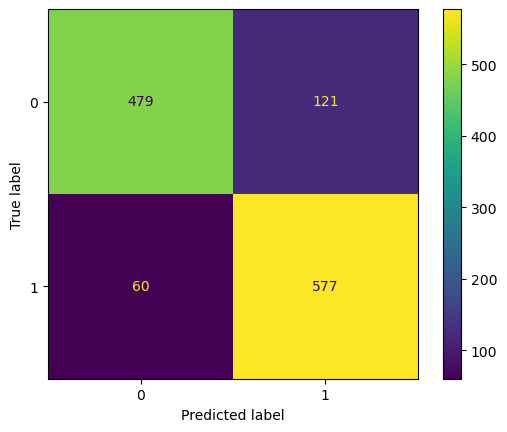

In [77]:
svm4 = SVC()
svm4.fit(x_train,y_train)
y_pred = svm4.predict(x_test)
print('Test accuracy:',svm4.score(x_test,y_test))
print('train accuracy:',svm4.score(x_train,y_train))
print("SVC Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
svm4_osc=accuracy_score(y_test,y_pred)

Test accuracy: 0.8237671786580436
train accuracy: 0.7961871750433276
 GaussianNb Performance:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       600
           1       0.80      0.88      0.84       637

    accuracy                           0.82      1237
   macro avg       0.83      0.82      0.82      1237
weighted avg       0.83      0.82      0.82      1237



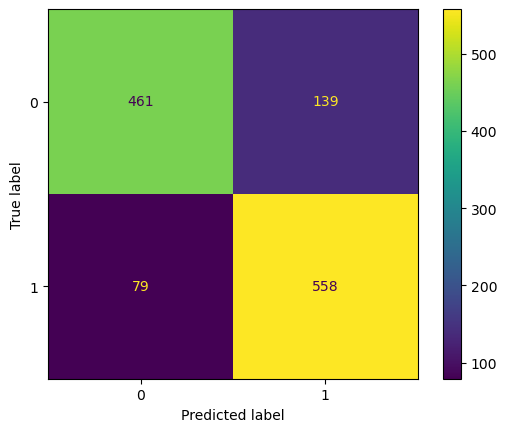

In [78]:
gaus = GaussianNB()
gaus.fit(x_train,y_train)
y_pred = gaus.predict(x_test)
print('Test accuracy:',gaus.score(x_test,y_test))
print('train accuracy:',gaus.score(x_train,y_train))
print(" GaussianNb Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
gaus_osc=accuracy_score(y_test,y_pred)

Test accuracy: 0.826192400970089
train accuracy: 0.8277296360485269
AdaBoost Performance:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       600
           1       0.80      0.88      0.84       637

    accuracy                           0.83      1237
   macro avg       0.83      0.82      0.83      1237
weighted avg       0.83      0.83      0.83      1237



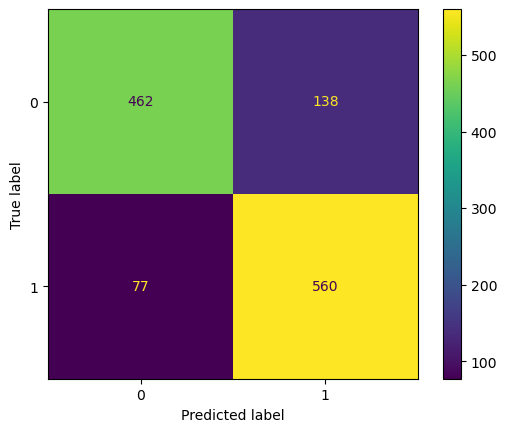

In [79]:
ab_clf = AdaBoostClassifier(n_estimators=100, learning_rate= 0.3 ,random_state=20)
ab_clf.fit(x_train,y_train)
y_pred = ab_clf.predict(x_test)
print('Test accuracy:',ab_clf.score(x_test,y_test))
print('train accuracy:',ab_clf.score(x_train,y_train))
print("AdaBoost Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
ab_osc=accuracy_score(y_test,y_pred)

Test accuracy: 0.8310428455941795
train accuracy: 0.9175043327556326
XGBoost Performance:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       600
           1       0.82      0.86      0.84       637

    accuracy                           0.83      1237
   macro avg       0.83      0.83      0.83      1237
weighted avg       0.83      0.83      0.83      1237



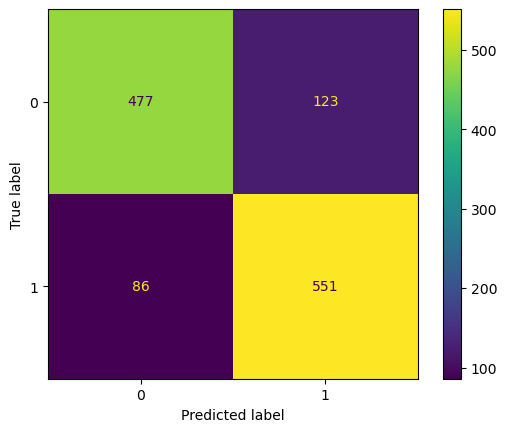

In [80]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, random_state=20)
gb_clf.fit(x_train,y_train)
y_pred = gb_clf.predict(x_test)
print('Test accuracy:',gb_clf.score(x_test,y_test))
print('train accuracy:',gb_clf.score(x_train,y_train))
print("XGBoost Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
gb_osc=accuracy_score(y_test,y_pred)

Test accuracy: 0.826192400970089
train accuracy: 0.9958405545927209
XGBoost Performance:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       600
           1       0.81      0.86      0.84       637

    accuracy                           0.83      1237
   macro avg       0.83      0.83      0.83      1237
weighted avg       0.83      0.83      0.83      1237



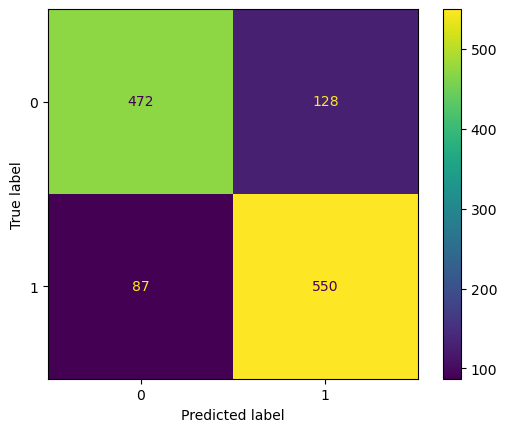

In [81]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train,y_train)
y_pred = xgb_clf.predict(x_test)
print('Test accuracy:',xgb_clf.score(x_test,y_test))
print('train accuracy:',xgb_clf.score(x_train,y_train))
print("XGBoost Performance:")
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
xgb_osc=accuracy_score(y_test,y_pred)*100

PERFORMANCE AFTER OVER SAMPLING

In [83]:
tb=pd.DataFrame()
tb['model']=pd.Series(['log_reg','dt_clf','rf_clf','knn_clf','svm','svm1','svm2','svm3','svm4','gaus','ab_clf','gb_clf','xgb_clf'])
tb['accuracy']=pd.Series([log_sc,dt_sc,rf_sc,knn_sc,svm_sc,svm1_sc,svm2_sc,svm3_sc,svm4_sc,gaus_sc,ab_sc,gb_sc,xgb_sc])
tb['Accuracy_oversampling']=pd.Series([log_osc,dt_osc,rf_osc,knn_osc,svm_osc,svm1_osc,svm2_osc,svm3_osc,svm4_osc,gaus_osc,ab_osc,gb_osc,xgb_osc])
tb

,model,accuracy,Accuracy_oversampling
0,log_reg,0.817333,0.827001
1,dt_clf,0.744000,0.758286
2,rf_clf,0.825333,0.857720
3,knn_clf,0.776667,0.795473
4,svm,0.778667,0.793048
5,svm1,0.826000,0.831043
6,svm2,0.757333,0.739693
7,svm3,0.824667,0.853678
8,svm4,0.824667,0.853678
9,gaus,0.795333,0.823767


HYPER PARAMETER TUNING

In [85]:
par={'C':[0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear','lbfgs','saga']}
log_regt=GridSearchCV(log_reg,par,cv=10,scoring='accuracy')
log_regt.fit(x_train,y_train)
print(log_regt.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


Test accuracy: 0.8270008084074374
train accuracy: 0.8246100519930676
CR:               precision    recall  f1-score   support

           0       0.84      0.79      0.81       600
           1       0.81      0.86      0.84       637

    accuracy                           0.83      1237
   macro avg       0.83      0.83      0.83      1237
weighted avg       0.83      0.83      0.83      1237



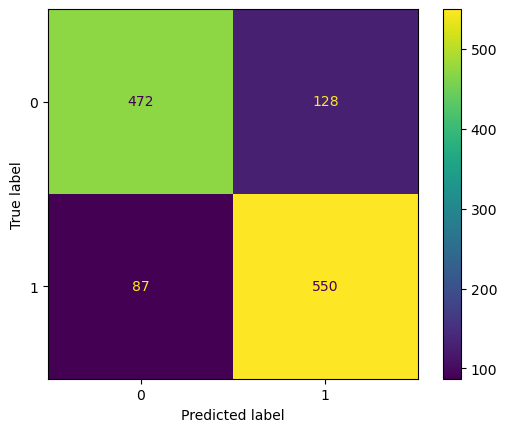

In [86]:
log_reg=LogisticRegression(C=1,penalty='l1',solver='liblinear')
log_reg.fit(x_train,y_train)
print('Test accuracy:',log_reg.score(x_test,y_test))
print('train accuracy:',log_reg.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
log_regt=accuracy_score(y_test,y_pred)*100
y_tpred1=log_reg.predict(x_train)
log_regtt=accuracy_score(y_tpred1,y_train)*100

In [87]:
par={'max_depth':[3,5,10],'criterion':['gini','entropy']}
dt_clft=GridSearchCV(dt_clf,par,cv=10,scoring='accuracy')
dt_clft.fit(x_train,y_train)
print(dt_clft.best_params_)

{'criterion': 'entropy', 'max_depth': 5}


Test accuracy: 0.8059822150363783
train accuracy: 0.9303292894280762
CR:               precision    recall  f1-score   support

           0       0.84      0.74      0.79       600
           1       0.78      0.86      0.82       637

    accuracy                           0.81      1237
   macro avg       0.81      0.80      0.80      1237
weighted avg       0.81      0.81      0.81      1237



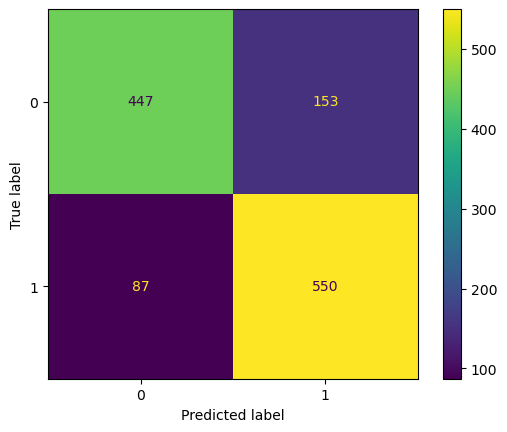

In [88]:
dt_clf=DecisionTreeClassifier(criterion='gini',max_depth=10)
dt_clf.fit(x_train,y_train)
y_predd=dt_clf.predict(x_test)
print('Test accuracy:',dt_clf.score(x_test,y_test))
print('train accuracy:',dt_clf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predd))
print('CR:',classification_report(y_test,y_predd))
dt_clft=accuracy_score(y_test,y_predd)*100
y_tpred2=dt_clf.predict(x_train)
dt_clftt=accuracy_score(y_tpred2,y_train)*100

In [89]:
par={'max_depth':['None',10,20,30],'max_features':['auto','sqrt','log2']}
rf_clft=GridSearchCV(rf_clf,par,cv=10,scoring='accuracy')
rf_clft.fit(x_train,y_train)
print(rf_clft.best_params_)

{'max_depth': 20, 'max_features': 'sqrt'}


Test accuracy: 0.8658043654001617
train accuracy: 0.9237435008665511
CR:               precision    recall  f1-score   support

           0       0.89      0.82      0.86       600
           1       0.84      0.91      0.87       637

    accuracy                           0.87      1237
   macro avg       0.87      0.86      0.87      1237
weighted avg       0.87      0.87      0.87      1237



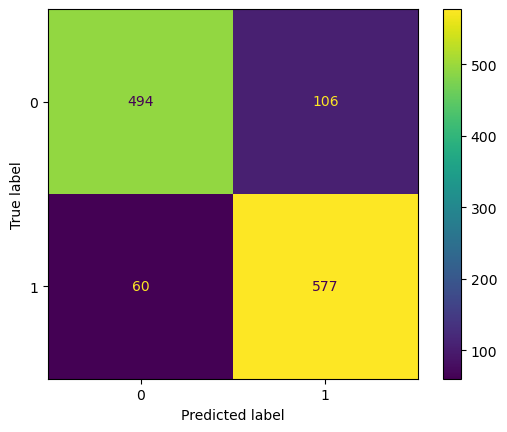

In [90]:
rf_clf=RandomForestClassifier(max_depth=10,max_features='sqrt')
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)
print('Test accuracy:',rf_clf.score(x_test,y_test))
print('train accuracy:',rf_clf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
rf_clft=accuracy_score(y_test,y_pred)*100
y_tpred3=rf_clf.predict(x_train)
rf_clftt=accuracy_score(y_tpred3,y_train)*100

In [91]:
par={'n_neighbors':[3,5,27,59,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree']}
knn_clft=GridSearchCV(knn_clf,par,cv=10,scoring='accuracy')
knn_clft.fit(x_train,y_train)
print(knn_clft.best_params_)

{'algorithm': 'auto', 'n_neighbors': 27, 'weights': 'distance'}


Test accuracy: 0.8156831042845594
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.85      0.75      0.80       600
           1       0.79      0.88      0.83       637

    accuracy                           0.82      1237
   macro avg       0.82      0.81      0.81      1237
weighted avg       0.82      0.82      0.81      1237



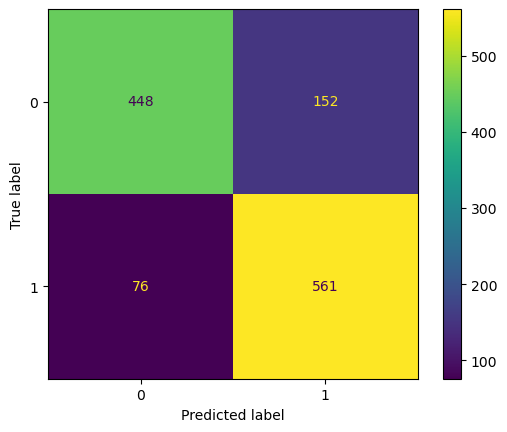

In [92]:
knn_clf=KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='distance')
knn_clf.fit(x_train,y_train)
y_pred=knn_clf.predict(x_test)
print('Test accuracy:',knn_clf.score(x_test,y_test))
print('train accuracy:',knn_clf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
knn_clft=accuracy_score(y_test,y_pred)*100
y_tpred4=knn_clf.predict(x_train)
knn_clftt=accuracy_score(y_tpred4,y_train)*100

In [93]:
par={'C':[1,10,20],'gamma':['auto'],'kernel':['linear']}
svm_t=GridSearchCV(svm,par,cv=10,scoring='accuracy')
svm_t.fit(x_train,y_train)
print(svm_t.best_params_)
          

{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}


Test accuracy: 0.7930476960388035
train accuracy: 0.7788561525129982
CR:               precision    recall  f1-score   support

           0       0.79      0.78      0.78       600
           1       0.79      0.81      0.80       637

    accuracy                           0.79      1237
   macro avg       0.79      0.79      0.79      1237
weighted avg       0.79      0.79      0.79      1237



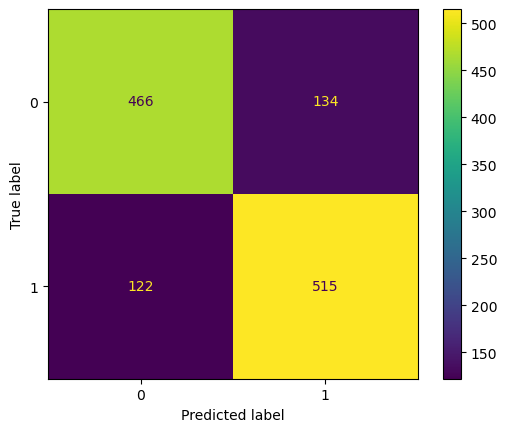

In [94]:
svm = SVC(kernel='linear',gamma='auto')
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
print('Test accuracy:',svm.score(x_test,y_test))
print('train accuracy:',svm.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
svmt=accuracy_score(y_test,y_pred)*100
y_tpred5=svm.predict(x_train)
svmtt=accuracy_score(y_tpred5,y_train)*100

In [95]:
par={'C':[1,10,20],'gamma':['auto'],'kernel':['poly']}
svm1_t=GridSearchCV(svm1,par,cv=10,scoring='accuracy')
svm1_t.fit(x_train,y_train)
print(svm1_t.best_params_)
          

{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}


Test accuracy: 0.8431689571544059
train accuracy: 0.8575389948006933
CR:               precision    recall  f1-score   support

           0       0.89      0.77      0.83       600
           1       0.81      0.92      0.86       637

    accuracy                           0.84      1237
   macro avg       0.85      0.84      0.84      1237
weighted avg       0.85      0.84      0.84      1237



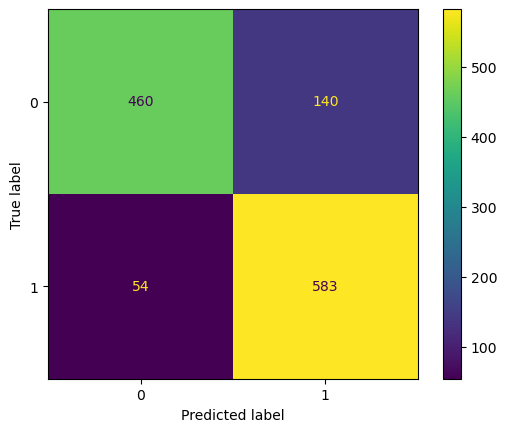

In [96]:
svm1= SVC(kernel='poly',gamma='auto',degree=3)
svm1.fit(x_train,y_train)
y_pred = svm1.predict(x_test)
print('Test accuracy:',svm1.score(x_test,y_test))
print('train accuracy:',svm1.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
svm1t=accuracy_score(y_test,y_pred)*100
y_tpred6=svm1.predict(x_train)
svm1tt=accuracy_score(y_tpred6,y_train)*100

In [97]:
par={'C':[1,10,20],'gamma':['auto'],'kernel':['sigmoid']}
svm2_t=GridSearchCV(svm2,par,cv=10,scoring='accuracy')
svm2_t.fit(x_train,y_train)
print(svm2_t.best_params_)       

{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid'}


Test accuracy: 0.7696038803556993
train accuracy: 0.7344887348353553
CR:               precision    recall  f1-score   support

           0       0.79      0.72      0.75       600
           1       0.76      0.81      0.78       637

    accuracy                           0.77      1237
   macro avg       0.77      0.77      0.77      1237
weighted avg       0.77      0.77      0.77      1237



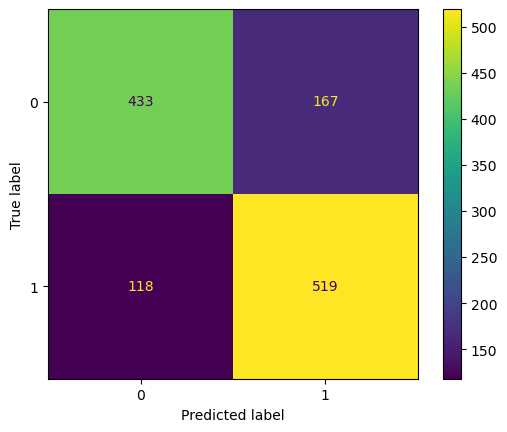

In [98]:
svm2 = SVC(kernel='sigmoid',gamma='auto')
svm2.fit(x_train,y_train)
y_pred = svm2.predict(x_test)
print('Test accuracy:',svm2.score(x_test,y_test))
print('train accuracy:',svm2.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
svm2t=accuracy_score(y_test,y_pred)*100
y_tpred7=svm2.predict(x_train)
svm2tt=accuracy_score(y_tpred7,y_train)*100

In [99]:
par={'C':[1,10,20],'gamma':['auto'],'kernel':['rbf']}
svm3_t=GridSearchCV(svm3,par,cv=10,scoring='accuracy')
svm3_t.fit(x_train,y_train)
print(svm3_t.best_params_)

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


Test accuracy: 0.8520614389652384
train accuracy: 0.866897746967071
CR:               precision    recall  f1-score   support

           0       0.89      0.79      0.84       600
           1       0.82      0.91      0.86       637

    accuracy                           0.85      1237
   macro avg       0.86      0.85      0.85      1237
weighted avg       0.86      0.85      0.85      1237



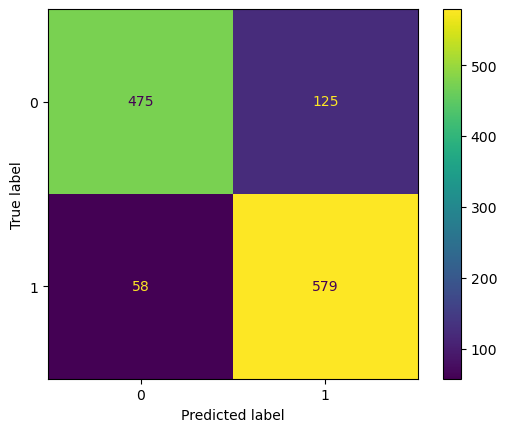

In [100]:
svm3 = SVC(kernel='rbf',gamma='auto')
svm3.fit(x_train,y_train)
y_pred = svm3.predict(x_test)
print('Test accuracy:',svm3.score(x_test,y_test))
print('train accuracy:',svm3.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
svm3t=accuracy_score(y_test,y_pred)*100
y_tpred8=svm3.predict(x_train)
svm3tt=accuracy_score(y_tpred8,y_train)*100

In [101]:
par={'C':[1,10,20],'gamma':['auto']}
svm4_t=GridSearchCV(svm4,par,cv=10,scoring='accuracy')
svm4_t.fit(x_train,y_train)
print(svm4_t.best_params_)

{'C': 1, 'gamma': 'auto'}


Test accuracy: 0.8536782538399353
train accuracy: 0.8759098786828423
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       600
           1       0.83      0.91      0.86       637

    accuracy                           0.85      1237
   macro avg       0.86      0.85      0.85      1237
weighted avg       0.86      0.85      0.85      1237



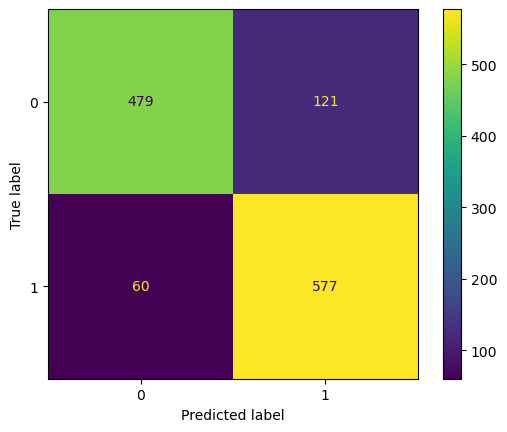

In [102]:
svm4 = SVC()
svm4.fit(x_train,y_train)
y_pred = svm4.predict(x_test)
print('Test accuracy:',svm4.score(x_test,y_test))
print('train accuracy:',svm4.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(classification_report(y_test,y_pred))
svm4t=accuracy_score(y_test,y_pred)
y_tpred9=svm4.predict(x_train)
svm4tt=accuracy_score(y_tpred9,y_train)*100

In [103]:
par={'var_smoothing':[1e-9,1e-8,1e-7]}
gaust=GridSearchCV(gaus,par,cv=10,scoring='accuracy')
gaust.fit(x_train,y_train)
print(gaust.best_params_)

{'var_smoothing': 1e-09}


Test accuracy: 0.8237671786580436
train accuracy: 0.7961871750433276
CR:               precision    recall  f1-score   support

           0       0.85      0.77      0.81       600
           1       0.80      0.88      0.84       637

    accuracy                           0.82      1237
   macro avg       0.83      0.82      0.82      1237
weighted avg       0.83      0.82      0.82      1237



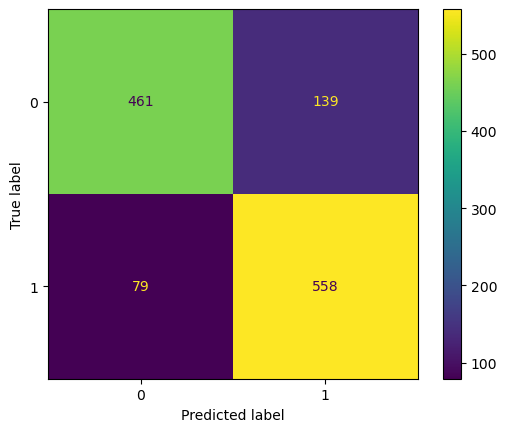

In [104]:
gaus=GaussianNB(var_smoothing=1e-07)
gaus.fit(x_train,y_train)
y_preds=gaus.predict(x_test)
print('Test accuracy:',gaus.score(x_test,y_test))
print('train accuracy:',gaus.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
gaust=accuracy_score(y_test,y_preds)*100
y_tpred10=gaus.predict(x_train)
gaustt=accuracy_score(y_tpred10,y_train)*100

In [ ]:
par={'n_estimators':[50,100,150],}
ab_clft=GridSearchCV(ab_clf,par,cv=10,scoring='accuracy')
ab_clft.fit(x_train,y_train)
print(ab_clft.best_params_)

Test accuracy: 0.8124494745351657
train accuracy: 0.7993067590987868
CR:               precision    recall  f1-score   support

           0       0.86      0.74      0.79       600
           1       0.78      0.88      0.83       637

    accuracy                           0.81      1237
   macro avg       0.82      0.81      0.81      1237
weighted avg       0.82      0.81      0.81      1237



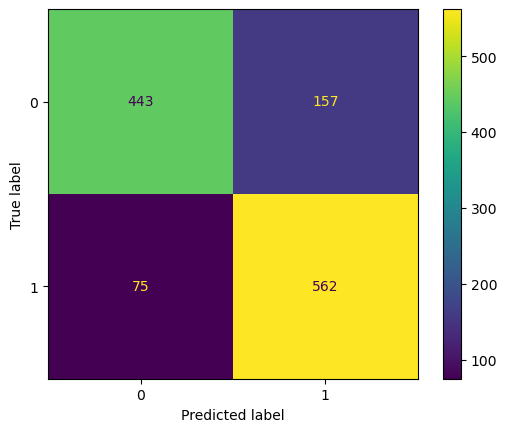

In [116]:
ab_clf=AdaBoostClassifier(n_estimators=50,learning_rate=0.1)
ab_clf.fit(x_train,y_train)
y_pred=ab_clf.predict(x_test)
print('Test accuracy:',ab_clf.score(x_test,y_test))
print('train accuracy:',ab_clf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
ab_clft=accuracy_score(y_test,y_pred)*100
y_tpred11=ab_clf.predict(x_train)
ab_clftt=accuracy_score(y_tpred10,y_train)*100

In [ ]:
par={'n_estimators':[100,200],'max_depth':[3,4,5]}
gb_clft=GridSearchCV(gb_clf,par,cv=10,scoring='accuracy')
gb_clft.fit(x_train,y_train)
print(gb_clft.best_params_)

Test accuracy: 0.8439773645917542
train accuracy: 0.8942807625649913
CR:               precision    recall  f1-score   support

           0       0.86      0.81      0.83       600
           1       0.83      0.88      0.85       637

    accuracy                           0.84      1237
   macro avg       0.85      0.84      0.84      1237
weighted avg       0.85      0.84      0.84      1237



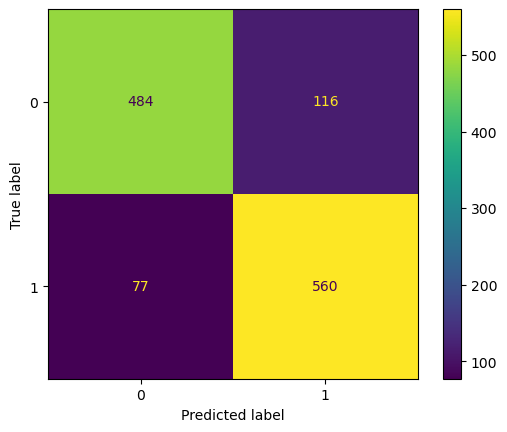

In [118]:
gb_clf=GradientBoostingClassifier(n_estimators=200,max_depth=3)
gb_clf.fit(x_train,y_train)
y_preds=gb_clf.predict(x_test)
print('Test accuracy:',gb_clf.score(x_test,y_test))
print('train accuracy:',gb_clf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
gb_clft=accuracy_score(y_test,y_preds)*100
y_tpred12=gb_clf.predict(x_train)
gb_clftt=accuracy_score(y_tpred12,y_train)*100

In [133]:
par={'n_estimators':[100,200],'max_depth':[3,4,5]}
xgb_clft=GridSearchCV(xgb_clf,par,cv=10,scoring='accuracy')
xgb_clft.fit(x_train,y_train)
print(xgb_clft.best_params_)

{'max_depth': 3, 'n_estimators': 100}


Test accuracy: 0.8383185125303153
train accuracy: 0.8949740034662045
CR:               precision    recall  f1-score   support

           0       0.85      0.81      0.83       600
           1       0.83      0.87      0.85       637

    accuracy                           0.84      1237
   macro avg       0.84      0.84      0.84      1237
weighted avg       0.84      0.84      0.84      1237



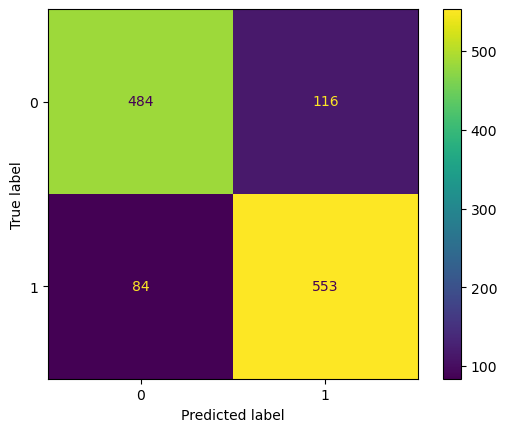

In [120]:
xgb_clf=XGBClassifier(n_estimators=100,max_depth=3)
xgb_clf.fit(x_train,y_train)
y_preds=xgb_clf.predict(x_test)
print('Test accuracy:',xgb_clf.score(x_test,y_test))
print('train accuracy:',xgb_clf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
xgb_clft=accuracy_score(y_test,y_preds)*100
y_tpred13=xgb_clf.predict(x_train)
xgb_clftt=accuracy_score(y_tpred13,y_train)*100

PERFORMANCE AFTER OVERSAMPLING

In [122]:
tb=pd.DataFrame()
tb['model']=pd.Series(['log_reg','dt_clf','rf_clf','knn_clf','svm','svm1','svm2','svm3','svm4','gaus','ab_clf','gb_clf','xgb_clf'])
tb['accuracy']=pd.Series([log_sc,dt_sc,rf_sc,knn_sc,svm_sc,svm1_sc,svm2_sc,svm3_sc,svm4_sc,gaus_sc,ab_sc,gb_sc,xgb_sc])
tb['Accuracy_hyperparameter']=pd.Series([log_regt,dt_clft,rf_clft,knn_clft,svmt,svm1t,svm2t,svm3t,svm4t,gaust,ab_clft,gb_clft,xgb_clft])
tb

,model,accuracy,Accuracy_hyperparameter
0,log_reg,0.817333,82.619240
1,dt_clf,0.744000,80.598222
2,rf_clf,0.825333,86.580437
3,knn_clf,0.776667,81.568310
4,svm,0.778667,79.304770
5,svm1,0.826000,84.316896
6,svm2,0.757333,76.960388
7,svm3,0.824667,85.206144
8,svm4,0.824667,0.853678
9,gaus,0.795333,82.376718


TEST AND TRAIN ACCURACY

In [124]:
tb1=pd.DataFrame()
tb1['model']=pd.Series(['log_reg','dt_clf','rf_clf','knn_clf','svm','svm1','svm2','svm3','svm4','gaus','ab_clf','gb_clf','xgb_clf'])
tb1['Test Accuracy']=pd.Series([log_regtt,dt_clftt,rf_clftt,knn_clftt,svmtt,svm1tt,svm2tt,svm3tt,svm4tt,gaustt,ab_clftt,gb_clftt,xgb_clftt])
tb1['Train Accuracy']=pd.Series([log_regt,dt_clft,rf_clft,knn_clft,svmt,svm1t,svm2t,svm3t,svm4t,gaust,ab_clft,gb_clft,xgb_clft])
tb1

,model,Test Accuracy,Train Accuracy
0,log_reg,82.461005,82.619240
1,dt_clf,93.032929,80.598222
2,rf_clf,92.374350,86.580437
3,knn_clf,100.000000,81.568310
4,svm,77.885615,79.304770
5,svm1,85.753899,84.316896
6,svm2,73.448873,76.960388
7,svm3,86.689775,85.206144
8,svm4,87.590988,0.853678
9,gaus,79.618718,82.376718


DEPLOYMENT

In [126]:
import joblib
joblib.dump(rf_clf,'C:/Users/shaha/lung_model.pkl')

['C:/Users/shaha/lung_model.pkl']

In [128]:
joblib.dump(scaler,'C:/Users/shaha/scaler.pkl')

['C:/Users/shaha/scaler.pkl']